### 데이터 가져오기

https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("data/train.csv")
# test = pd.read_csv("data/test.csv")

In [3]:
# 데이터 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### datetime 컬럼 처리

In [4]:
# datetime을 각 시간요소로 분리
train["datetime"] = pd.to_datetime(train["datetime"])
# test["datetime"] = pd.to_datetime(test["datetime"])

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

# test["year"] = test["datetime"].dt.year
# test["month"] = test["datetime"].dt.year
# test["day"] = test["datetime"].dt.day
# test["hour"] = test["datetime"].dt.hour
# test["minute"] = test["datetime"].dt.minute
# test["second"] = test["datetime"].dt.second

In [5]:
# datetime컬럼 삭제
train.drop("datetime", axis=1, inplace=True)
# test.drop("datetime", axis=1, inplace=True)

In [6]:
# 시간요소 시각화
import seaborn as sns
import matplotlib.pyplot as plt

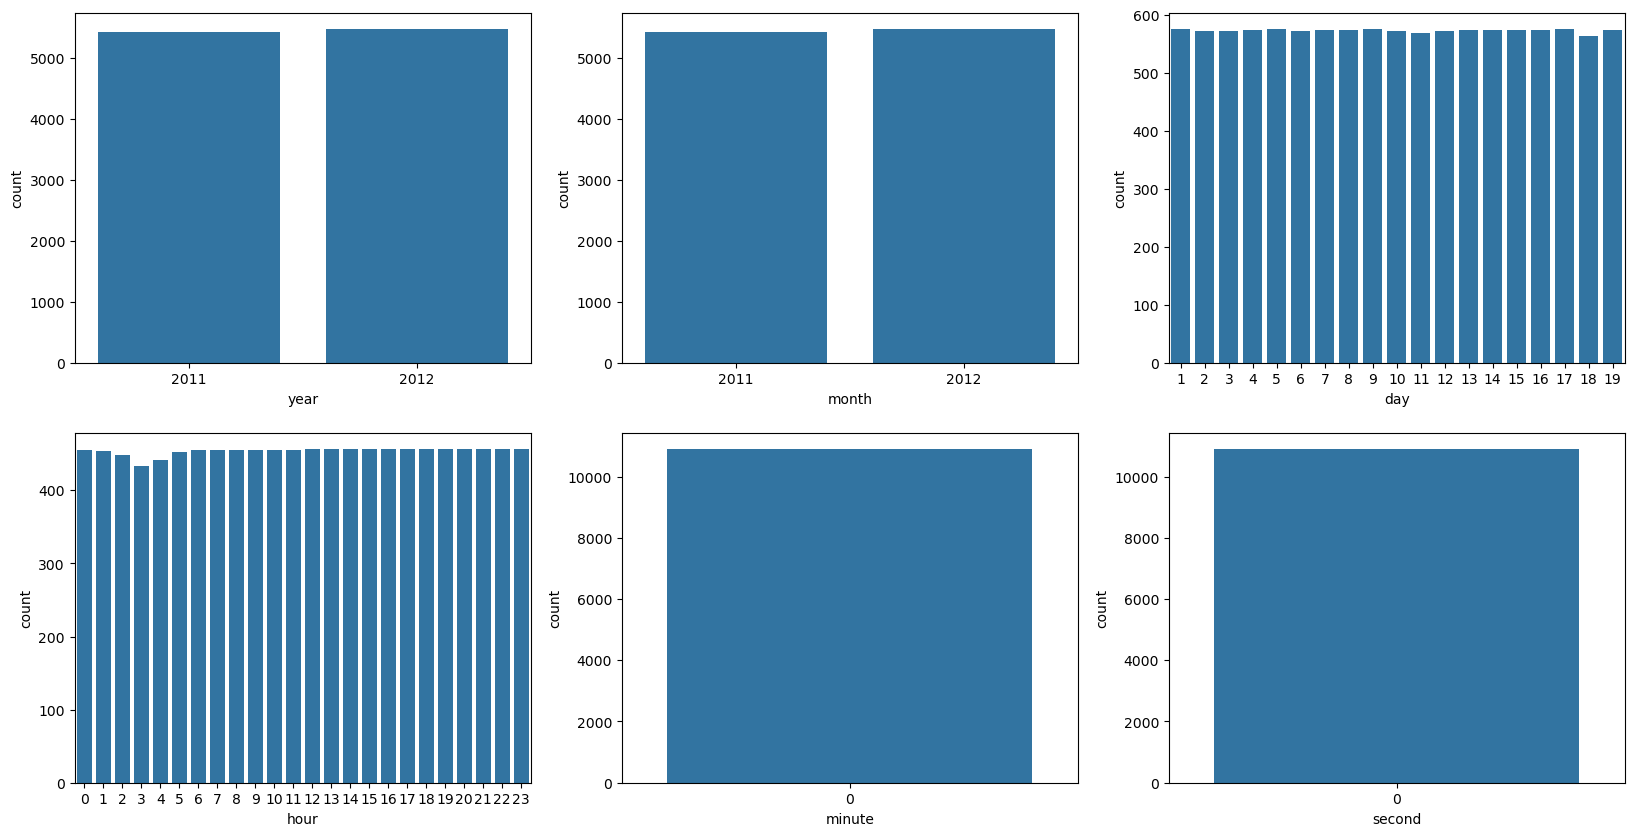

In [44]:
time = ["year", "month", "day", "hour", "minute", "second"]
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
for i, t in enumerate(time):
    sns.countplot(x=train[t], ax=ax[i // 3, i % 3])

In [8]:
# 시각화로 day에 중간에 비어있는 것과 hour 양 끝에 2배인 것을 수동으로 확인
train["day"].value_counts()

day
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

In [9]:
train["hour"].value_counts()

hour
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: count, dtype: int64

### 데이터 분리

In [10]:
# 타겟값과 타겟값에 직접적인 영향을 주는 특성 제거
y = train.pop("count")
train.drop(["casual", "registered"], axis=1, inplace=True)

In [11]:
import sklearn.model_selection

X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(train, y)

In [12]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((8164, 14), (8164,), (2722, 14), (2722,))

### 모델 학습

lms에서 metric을 `rmse`를 요구하여 이를 사용하여 모델을 평가하였고, 나머지 하이퍼 파라미터는 일단 기본을 사용하고 성능에 문제가 있으면 다른걸 시도하려고 하였다.

In [13]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)

In [29]:
from sklearn.metrics import mean_squared_error as mse

error = mse(y_valid, pred) ** 0.5

In [30]:
error

143.8032912072617

성능이 좋지만 다른 모델도 학습시켜 보았다. 
Linear모델과 구조상 차이가 큰 랜덤포레스트를 시도하였다.

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_valid)

In [38]:
error2 = mse(y_valid, pred2) ** 0.5
error2

46.024481545485514

### 결과 시각화


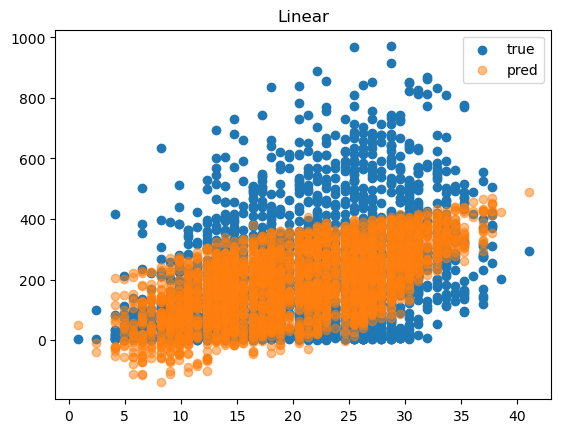

In [43]:
plt.title("Linear")
plt.scatter(X_valid["temp"], y_valid, label="true")
plt.scatter(X_valid["temp"], pred, label="pred", alpha=0.5)
plt.legend()
plt.show()

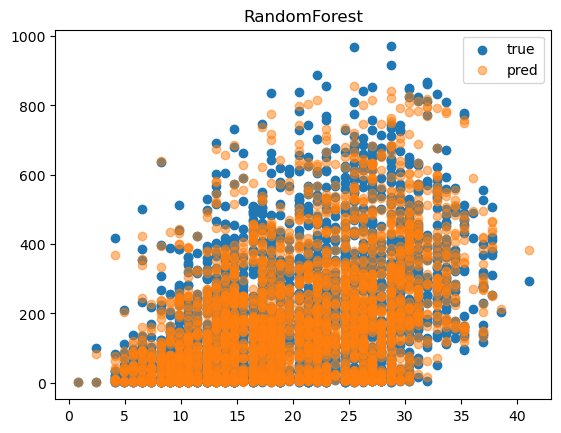

In [42]:
plt.title("RandomForest")
plt.scatter(X_valid["temp"], y_valid, label="true")
plt.scatter(X_valid["temp"], pred2, label="pred", alpha=0.5)
plt.legend()
plt.show()

### 결론

**최종 rmse : 46.024481545485514**

rmse도 유의미한 차이가 있고 시각화로도 랜덤포레스트가 상당히 잘 예측한 것을 볼 수 있었다.  

test는 count는 현제로써는 알 방법이 없기 때문에 test에 대해서 성능을 확인할 수 없었다.

프로젝트 1에서 학습이 안되는걸 해결하려고 많은 노력이 필요했었는데, 2처럼 만들어진 모델을 사용하면 많은 부분이 알아서 해결되니 매우 편하였다. 